# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
!ls

--2019-07-11 05:44:24--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv.1’

drinks.csv.1        100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-07-11 05:44:25 (77.8 MB/s) - ‘drinks.csv.1’ saved [4384/4384]

drinks.csv  drinks.csv.1  interactive_bokeh_plot.html  sample_data


In [91]:
# Second copy for fooling around with bash.

drinks2 = pd.read_csv('drinks.csv')
drinks2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [92]:
# a quick change to the file for pull requests.
the_answer = 40 + 2
print(the_answer)
print(2+2)

# Loading in the consumption data.
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drinks.shape)
drinks.head(10)

42
4
(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


In [93]:
# Loading in the countries data.

countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head(10)

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
5,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
6,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
7,Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


In [94]:
# Changing 'USA' to 'United States of America'

drinks.at[184,'country'] = 'United States of America'
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
Name: 184, dtype: object

In [95]:
drinks.columns
drinks.sort_values('beer_servings',ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


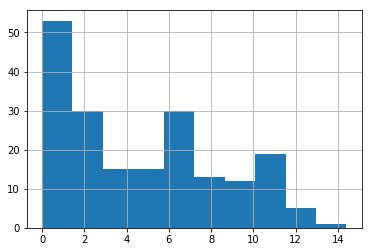

In [96]:
drinks.total_litres_of_pure_alcohol.hist()
plt.show()

In [97]:
# Building a feature for bucketing consumption.
drinks['drinks_alcohol'] = np.where(drinks.total_litres_of_pure_alcohol > 9, 'high',
                           np.where(drinks.total_litres_of_pure_alcohol > 6, 'medium',
                           np.where(drinks.total_litres_of_pure_alcohol == 0, 'none', 'low')))
drinks.drinks_alcohol.value_counts()

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

In [98]:
# Joining the countries table on the consumption table.
countries[['name','region','sub-region']]

df = drinks.join(countries[['name','region','sub-region']], how='left')
print(df.shape)
df.head(10)

# Improper join.

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,low,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,low,American Samoa,Oceania,Polynesia
5,Antigua & Barbuda,102,128,45,4.9,low,Andorra,Europe,Southern Europe
6,Argentina,193,25,221,8.3,medium,Angola,Africa,Sub-Saharan Africa
7,Armenia,21,179,11,3.8,low,Anguilla,Americas,Latin America and the Caribbean
8,Australia,261,72,212,10.4,high,Antarctica,NaN,NaN
9,Austria,279,75,191,9.7,high,Antigua and Barbuda,Americas,Latin America and the Caribbean


In [99]:
# On the other hand, merge() works.
df2 = pd.merge(drinks, countries[['name','region','sub-region']], how='left', left_on='country', right_on='name')
print(df2.shape)
df2.head(10)

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
6,Argentina,193,25,221,8.3,medium,Argentina,Americas,Latin America and the Caribbean
7,Armenia,21,179,11,3.8,low,Armenia,Asia,Western Asia
8,Australia,261,72,212,10.4,high,Australia,Oceania,Australia and New Zealand
9,Austria,279,75,191,9.7,high,Austria,Europe,Western Europe


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
drinks_alcohol                  193 non-null object
name                            168 non-null object
region                          168 non-null object
sub-region                      168 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [101]:
df2.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            25
region                          25
sub-region                      25
dtype: int64

In [102]:
# Show the countries which did not get joined properly
df2[df2.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,high,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,medium,NaN,NaN,NaN


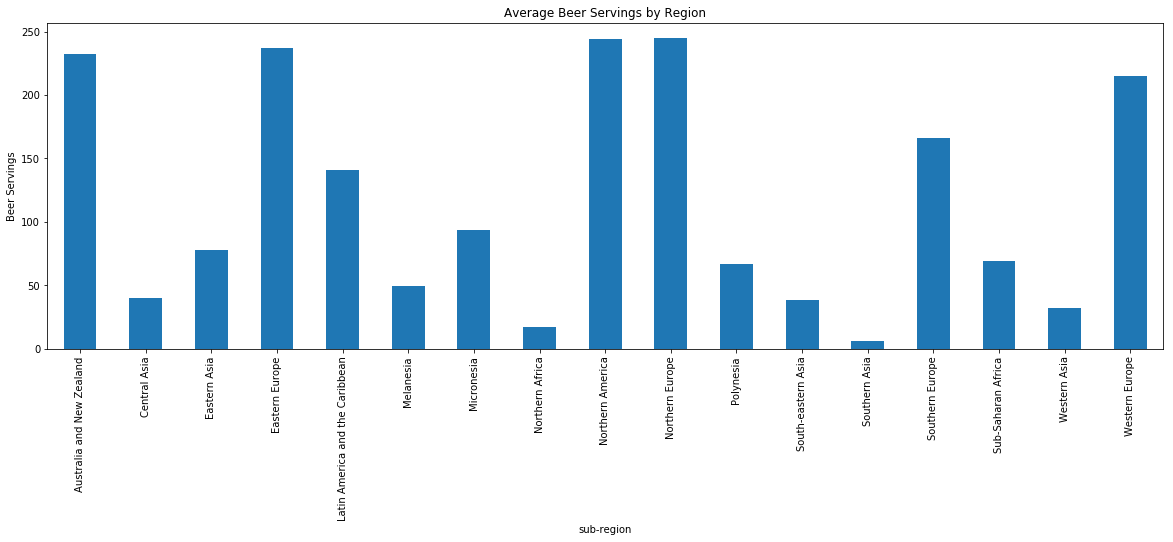

In [103]:
df2.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize = [20,6])
plt.title('Average Beer Servings by Region')
plt.ylabel('Beer Servings')
plt.show()

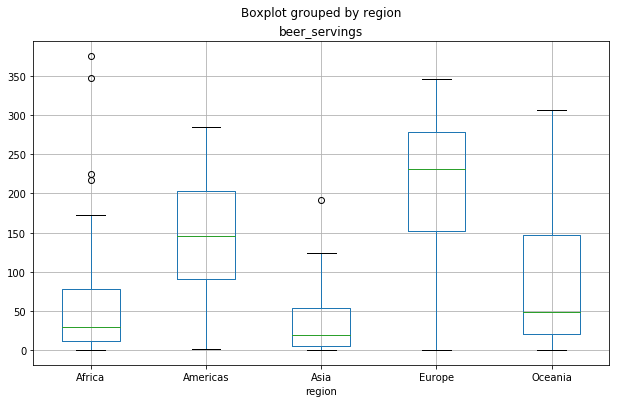

In [104]:
df2.boxplot(column='beer_servings', by='region', figsize=(10,6))
plt.show()

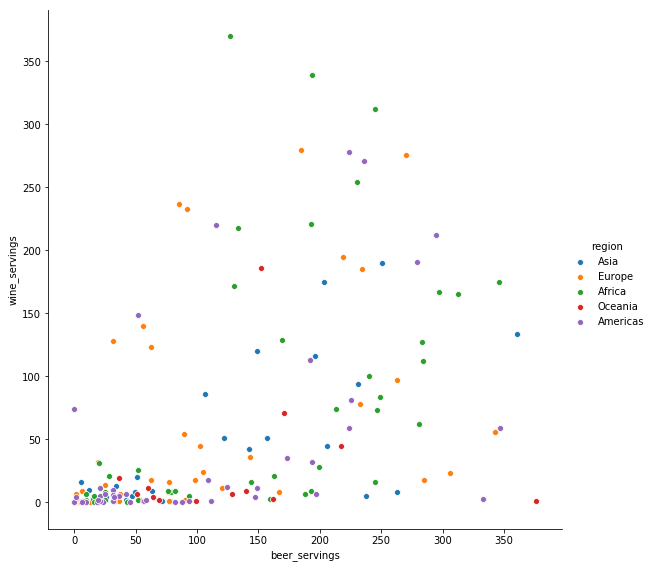

In [105]:
sns.pairplot(x_vars=["beer_servings"], y_vars=["wine_servings"], data=df, hue="region", height=8)
plt.show()

In [106]:
# Drop the nulls for Bokeh
df = df2.dropna(subset=['region'])
df.shape

(168, 9)

In [107]:
import seaborn as sns

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()
x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region
source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])
palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)
# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")
# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)
# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"
output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [108]:
# Installing packages
!pip install datapackage

import datapackage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# load employmemt data

data_url = 'https://datahub.io/core/employment-us/datapackage.json'

package = datapackage.Package(data_url)

resources = package.resources
for resource in resources:
    if resource.tabular:
        employmentdata = pd.read_csv(resource.descriptor['path'])

In [0]:
# There's two rows for 1947! We'll drop the first one.
employmentdata = employmentdata.drop(index = 6)

In [111]:
employmentdata.head(10)
# Now we're sorted.

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN
5,1946,103070,57520,55.8,55250,53.6,8320,46930,2270,3.9,45550,NaN
7,1947,101827,59350,58.3,57038,56.0,7890,49148,2311,3.9,42477,NaN
8,1948,103068,60621,58.8,58343,56.6,7629,50714,2276,3.8,42447,NaN
9,1949,103994,61286,58.9,57651,55.4,7658,49993,3637,5.9,42708,NaN
10,1950,104995,62208,59.2,58918,56.1,7160,51758,3288,5.3,42787,NaN


In [0]:
# load inflation data

data_url = 'https://datahub.io/JohnSnowLabs/us-consumer-price-index-and-inflation/datapackage.json'

package = datapackage.Package(data_url)

resources = package.resources
for resource in resources:
    if resource.tabular:
        inflationdata = pd.read_csv(resource.descriptor['path'])

In [0]:
# Make a new column, date2, which contains the dates as type datetime rather than string.

inflationdata['date2'] = pd.to_datetime(inflationdata.Date)

In [0]:
# Make a new column, year, to contain the year portion of our data.
inflationdata['year'] = 0

In [0]:
# Fill the year column with the respective years.
for x in range(len(inflationdata.date2)):
  inflationdata.at[x,'year'] = inflationdata.date2[x].year

In [0]:
# Drop the inflation data prior to the start of our employment data.
inflationdata = inflationdata.drop(inflationdata[inflationdata.year < employmentdata.year.min() ].index)

In [0]:
# Drop the inflation data after the end of our employment data.
inflationdata = inflationdata.drop(inflationdata[inflationdata.year > employmentdata.year.max() ].index)

In [0]:
# Cheating a little here - the function to pull together monthly inflation into yearly inflation isn't a sum, but I'm running out of time!
# It'll undershoot a little, but since the percentages tend to be small, it's no big deal. 10% increase + 10% increase = 20%, 10% increase * 10% increase = 21% increase.
inflationdata2 = inflationdata.groupby('year').Price_Inflation.sum()

In [119]:
# Check that our starting and ending years are the same, and that the number of rows is equal.

print(inflationdata2.index.min(), inflationdata2.index.max())
print(employmentdata.year.min(), employmentdata.year.max())
print(inflationdata2.shape)
print(employmentdata.shape)

1941 2010
1941 2010
(70,)
(70, 12)


<function matplotlib.pyplot.show>

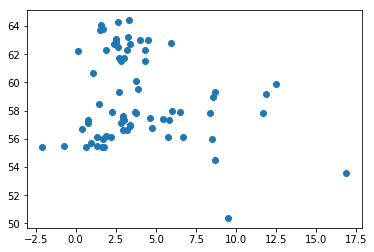

<Figure size 1440x720 with 0 Axes>

In [120]:
# Plot our inflation against our employment numbers.
fig = plt.scatter(inflationdata2,employmentdata.employed_percent);

plt.figure(figsize=(20,10))
plt.show

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?


1. This is a quick visualization of the relationship between employment and inflation - it's considered a very important relationship by economists, and the relationship between the two is often called the Phillips Curve. Generally it's expected that higher employment produces greater inflation - more people with more money drives the prices of consumer goods up. Lately the Fed has been doubting the validity of the Phillips Curve - more specifically, that the Phillips Curve *used* to be a valid trend but is no longer. If that's the case, you should be able to see a trend in the early years of the scatterplot, that might disappear as the years grow more recent.

2. I accidentally deleted all my code halfway through! I also ran into two other issues - ~~one is that despite collapsing monthly inflation into yearly inflation using groupby() and sum(), I still ended up with an extra row, despite validating that my starting and ending years matched for both data sets.~~ Fixed this - the employment data had an extra year, which I dropped.

  My other issue was the actual use of sum() - a sum is not the proper function to use to combine monthly inflation into yearly inflation, but since the numbers are quite small, the error it produces is quite small.

3. In my exploits with alternatives to sum(), I tried product(). That threw an error, but the error recommened using apply(). I tried using np.prod() within apply, which produced strange results - likely because if the inflation data is bare percentages, multiplying them together outright doesn't work - but with some additional processing of that data (or a clever function in apply), it absolutely could! Apply() strikes me as something that may come in handy shortly.

4. Definitely apply(), and finding the proper function to use to roll monthly inflation percentages into a yearly percentage.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.